In [4]:
pip install numpy matplotlib tensorflow tensorflow_datasets

     |████████████████████████████████| 4.2 MB 814 kB/s eta 0:00:01
     |████████████████████████████████| 76 kB 941 kB/s eta 0:00:01
     |████████████████████████████████| 48 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 86 kB 865 kB/s eta 0:00:01
     |████████████████████████████████| 212 kB 892 kB/s eta 0:00:01


  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=33f35fbdfb2cb4bca2c03ef36c1e976fa6fcec583b8552abc7181f8bee372f98
  Stored in directory: /Users/kuro_ye/Library/Caches/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [2]:
# hyper-parameters
batch_size = 64
# 10 categories of images (CIFAR-10)
num_classes = 10
# number of training epochs
epochs = 30

In [3]:
def load_data():
    """
    This function loads CIFAR-10 dataset, and preprocess it
    """
    def preprocess_image(image, label):
        # convert [0, 255] range integers to [0, 1] range floats
        image = tf.image.convert_image_dtype(image, tf.float32)
        return image, label
    # loading the CIFAR-10 dataset, splitted between train and test sets
    ds_train, info = tfds.load("cifar10", with_info=True, split="train", as_supervised=True)
    ds_test = tfds.load("cifar10", split="test", as_supervised=True)
    # repeat dataset forever, shuffle, preprocess, split by batch
    ds_train = ds_train.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    ds_test = ds_test.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    return ds_train, ds_test, info

In [4]:
def create_model(input_shape):
    # building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # flattening the convolutions
    model.add(Flatten())
    # fully-connected layer
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    # print the summary of the model architecture
    model.summary()
    # training the model using adam optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [5]:
if __name__ == "__main__":
    # load the data
    ds_train, ds_test, info = load_data()
    # constructs the model
    model = create_model(input_shape=info.features["image"].shape)
    # some nice callbacks
    logdir = os.path.join("logs", "cifar10-model-v1")
    tensorboard = TensorBoard(log_dir=logdir)
    # make sure results folder exist
    if not os.path.isdir("results"):
        os.mkdir("results")
    # train
    model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=1,
              steps_per_epoch=info.splits["train"].num_examples // batch_size,
              validation_steps=info.splits["test"].num_examples // batch_size,
              callbacks=[tensorboard])
    # save the model to disk
    model.save("results/cifar10-model-v1.h5")

2022-03-04 07:31:47.031911: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2022-03-04 07:33:43.779683: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shuffling /Users/kuro_ye/tensorflow_datasets/cifar10/3.0.2.incomplete4EJVJF/cifar10-train.tfrecord*...:   0%| …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /Users/kuro_ye/tensorflow_datasets/cifar10/3.0.2.incomplete4EJVJF/cifar10-test.tfrecord*...:   0%|  …

Dataset cifar10 downloaded and prepared to /Users/kuro_ye/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

2022-03-04 07:34:05.181352: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-04 07:34:05.181366: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-04 07:34:05.181823: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-04 07:34:05.201737: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


  2/781 [..............................] - ETA: 2:16 - loss: 2.2831 - accuracy: 0.1172

2022-03-04 07:34:05.945641: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-04 07:34:05.945656: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-04 07:34:06.105652: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-04 07:34:06.115390: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-04 07:34:06.125097: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/cifar10-model-v1/train/plugins/profile/2022_03_04_07_34_06

2022-03-04 07:34:06.131383: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/cifar10-model-v1/train/plugins/profile/2022_03_04_07_34_06/Erhans-MBP.trace.json.gz
2022-03-04 07:34:06.135980: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/cifar10-model-v1/train/plugins/profile/2

781/781 [==============================] - 120s 153ms/step - loss: 1.6185 - accuracy: 0.4012 - val_loss: 1.1954 - val_accuracy: 0.5684
Epoch 2/30
781/781 [==============================] - 130s 166ms/step - loss: 1.1477 - accuracy: 0.5883 - val_loss: 0.9472 - val_accuracy: 0.6664
Epoch 3/30
781/781 [==============================] - 133s 170ms/step - loss: 0.9614 - accuracy: 0.6605 - val_loss: 0.8391 - val_accuracy: 0.7059
Epoch 4/30
781/781 [==============================] - 139s 178ms/step - loss: 0.8401 - accuracy: 0.7029 - val_loss: 0.7837 - val_accuracy: 0.7269
Epoch 5/30
781/781 [==============================] - 139s 178ms/step - loss: 0.7661 - accuracy: 0.7308 - val_loss: 0.7283 - val_accuracy: 0.7447
Epoch 6/30
781/781 [==============================] - 144s 184ms/step - loss: 0.7146 - accuracy: 0.7509 - val_loss: 0.6840 - val_accuracy: 0.7687
Epoch 7/30
781/781 [==============================] - 143s 183ms/step - loss: 0.6717 - accuracy: 0.7657 - val_loss: 0.6733 - val_accura

In [6]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# CIFAR-10 classes
categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [8]:
# load the testing set
ds_train, ds_test, info = load_data()
# load the model with final model weights
model = load_model("results/cifar10-model-v1.h5")

In [1]:
# get prediction for this image
data_sample = next(iter(ds_test))
sample_image = data_sample[0].numpy()[0]
sample_label = categories[data_sample[1].numpy()[0]]
prediction = np.argmax(model.predict(sample_image.reshape(-1, *sample_image.shape))[0])
print("Predicted label:", categories[prediction])
print("True label:", sample_label)

plt.axis('off')
plt.imshow(sample_image)
plt.show()

NameError: name 'ds_test' is not defined

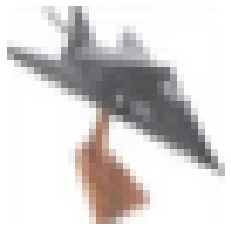

In [38]:
def prepare(filepath):
    IMG_SIZE = 28  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    print(img_array)
#     new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
#     return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

# prediction = model.predict([prepare('dog.jpeg')])
# print(prediction)  # will be a list in a list.
prepare('dog.jpeg')

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [49]:
data_sample = next(iter(ds_test))
# sample_image = data_sample[0].numpy()[0]

sample_image = cv2.imread('dog.jpeg', cv2.IMREAD_GRAYSCALE)

# print(sample_image.reshape(-1, *sample_image.shape))

sample_image = cv2.resize(sample_image,(28,28))
sample_image = np.array(sample_image)
sample_image = sample_image.reshape(-1, 28,28,1)
print(sample_image.shape)


# sample_label = categories[data_sample[1].numpy()[0]]
prediction = np.argmax(model.predict(sample_image)[0])
print("Predicted label:", categories[prediction])
# print("True label:", sample_label)

plt.axis('off')
plt.imshow(sample_image)
plt.show()

(1, 28, 28, 1)


2022-03-04 09:32:37.728917: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 28, 28, 1)


In [51]:
import cv2
import tensorflow as tf


def prepare(filepath):
    IMG_SIZE = 70  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("results/cifar10-model-v1.h5")

prediction = model.predict([prepare('dog.jpeg')])
print(prediction)  # will be a list in a list.
# print(CATEGORIES[int(prediction[0][0])])


ValueError: in user code:

    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 3 but received input with shape (None, 70, 70, 1)
